# PS3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4
import xarray as xr
%matplotlib inline

## 1. Global methane levels from 2002

Methane ($\text{CH}_4$) is a naturally occurring Greenhouse Gas (GHG), but one whose abundance has been increased substantially above its pre-industrial value by human activities, primarily because of agricultural emissions (e.g., rice production, ruminants) and fossil fuel production and use. A clear annual cycle is largely due to seasonal wetland emissions.

Atmospheric methane abundance is indirectly observed by various satellite instruments. These instruments measure spectrally resolved near-infrared and infrared radiation reflected or emitted by the Earth and its atmosphere. In the measured signal, molecular absorption signatures from methane and constituent gasses can be identified. It is through analysis of those absorption lines in these radiance observations that the averaged methane abundance in the sampled atmospheric column can be determined.

For this problem set, methane levels have been determined by applying several algorithms to different satellite instruments. Download the `netCDF4` file (`200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc`) here, which contains monthly-averaged methane levels (`xch4`) in the unit of ppb at each 5° (`lon`) x 5° (`lat`) grid over the globe from `2003-01` to `2020-06`.

### 1.1 
Compute methane climatology for each month, and plot your results in 12 panels.

In [2]:
ds = xr.open_dataset('data_files/200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc', engine='netcdf4')
ds

<xarray.Dataset>
Dimensions:                  (time: 210, bnds: 2, lat: 36, lon: 72, pressure: 10)
Coordinates:
  * time                     (time) datetime64[ns] 2003-01-16T12:00:00 ... 20...
  * lat                      (lat) float64 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * lon                      (lon) float64 -177.5 -172.5 -167.5 ... 172.5 177.5
Dimensions without coordinates: bnds, pressure
Data variables:
    time_bnds                (time, bnds) datetime64[ns] ...
    lat_bnds                 (lat, bnds) float64 ...
    lon_bnds                 (lon, bnds) float64 ...
    pre                      (pressure) float64 ...
    pre_bnds                 (pressure, bnds) float64 ...
    land_fraction            (lat, lon) float64 ...
    xch4                     (time, lat, lon) float32 ...
    xch4_nobs                (time, lat, lon) float64 ...
    xch4_stderr              (time, lat, lon) float32 ...
    xch4_stddev              (time, lat, lon) float32 ...
    column_averaging_kernel  (time, pressure, lat, lon) float32 ...
    vmr_profile_ch4_apriori  (time, pressure, lat, lon) float32 ...
Attributes: (12/28)
    activity_id:            obs4MIPs
    comment:                Since long time, climate modellers use ensemble a...
    contact:                Maximilian Reuter (maximilian.reuter@iup.physik.u...
    Conventions:            CF-1.7 ODS-2.1
    creation_date:          2021-02-05T09:48:47Z
    data_specs_version:     2.1.0
    ...                     ...
    source_version_number:  v4.3
    title:                  C3S XCH4 v4.3
    tracking_id:            892d184a-7b35-4bba-836a-94b9cfeb360e
    variable_id:            xch4
    variant_info:           Best Estimate
    variant_label:          BE

In [3]:
xch4_clim = ds.xch4.groupby('time.month').mean()

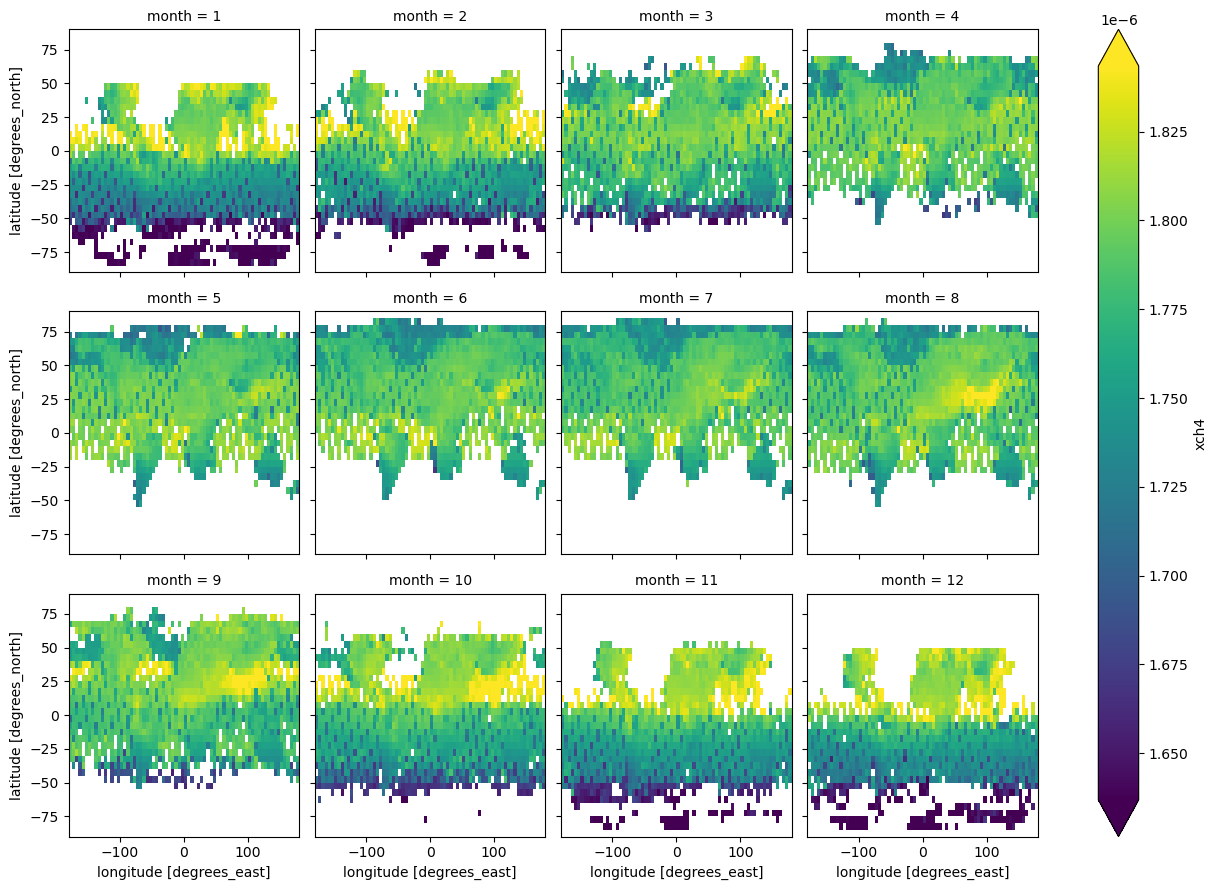

In [4]:
xch4_clim.plot(col="month", col_wrap=4, robust=True)

### 1.2
Plot globally-averaged methane from `2003-01` to `2020-06` as a time series. Describe your results. Check your plot with this one.

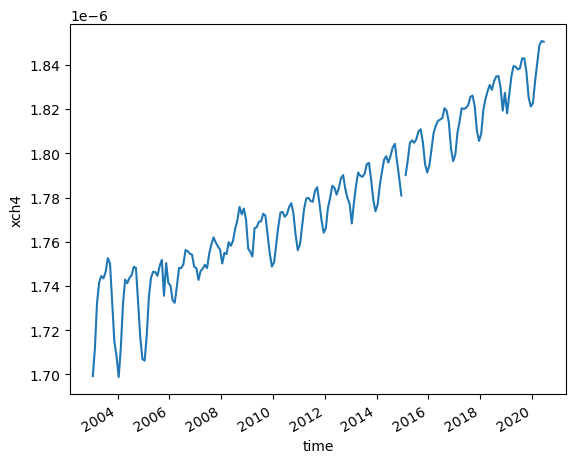

In [5]:
ds.xch4.sel(time=slice('2003-01','2020-06')).mean(dim='lat').mean(dim='lon').plot()

The golbally-averaged methane shows a steady increase trend despite periodic cycle within each year.

### 1.3
Plot deseasonalized methane levels at point `[15°S, 150°W]` from `2003-01` to `2020-06` as a time series. Describe your results.

E:\Programmes\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
E:\Programmes\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


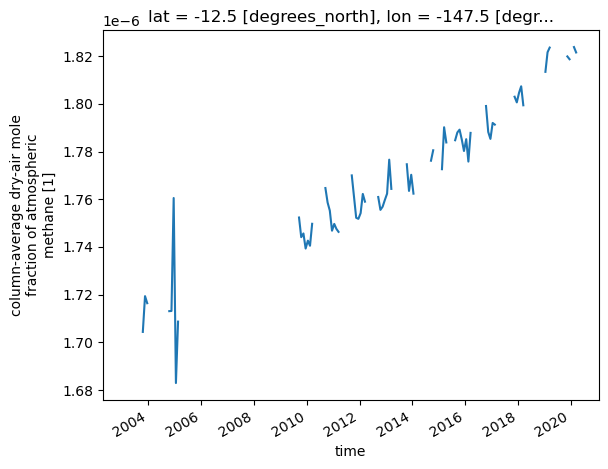

In [6]:
pnt = ds.xch4.sel(time=slice('2003-01','2020-06'))
pnt.sel(lon=-150, lat=-15, method='nearest').plot()

There are lots of missing data within the observation range. But it can be observed a growing trend during the past two decades.

## 2. Niño 3.4 index

The *Niño 3.4 anomalies* may be thought of as representing the average equatorial sea surface temperatures (SSTs) across the Pacific from about the dateline to the South American coast (`5N-5S`, `170W-120W`). The Niño 3.4 index typically uses a 3-month running mean, and El Niño or La Niña events are defined when the Niño 3.4 SSTs exceed `+/- 0.5°C` for a period of `5` months or more. Check Equatorial Pacific Sea Surface Temperatures for more about the Niño 3.4 index.

In this problem set, you will use the sea surface temperature (SST) data from NOAA. Download the `netCDF4` file (`NOAA_NCDC_ERSST_v3b_SST.nc`) here.

### 2.1
Compute monthly climatology for SST from Niño 3.4 region, and subtract climatology from SST time series to obtain anomalies.

In [7]:
ds2 = xr.open_dataset('data_files/NOAA_NCDC_ERSST_v3b_SST.nc', engine='netcdf4')
ds2

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [8]:
ds2 = ds2.sst.sel(lon=['190','240'],lat=['-6','6'])

In [9]:
overall_mean = ds2.mean()
overall_mean

<xarray.DataArray 'sst' ()>
array(27.786516, dtype=float32)

In [10]:
ds_rolling = ds2.rolling(time=3, center=True)
ds_rolling

DataArrayRolling [time->3(center)]

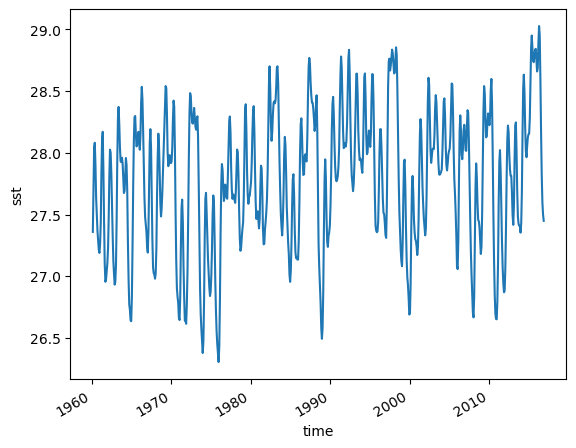

In [11]:
ds_rolling.mean().mean(dim=['lon','lat']).plot()

In [12]:
sst_anom = ds_rolling.mean() - overall_mean
sst_anom

<xarray.DataArray 'sst' (time: 684, lat: 2, lon: 2)>
array([[[        nan,         nan],
        [        nan,         nan]],

       [[ 0.8321419 , -1.4950333 ],
        [-0.40036774, -0.64657974]],

       [[ 0.9872036 , -0.79281235],
        [-0.36144066, -0.16091347]],

       ...,

       [[ 1.2324429 , -2.6276512 ],
        [ 1.1617756 , -0.912426  ]],

       [[ 1.2956429 , -2.4825268 ],
        [ 0.8325443 , -0.99769783]],

       [[        nan,         nan],
        [        nan,         nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -6.0 6.0
  * lon      (lon) float32 190.0 240.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15

### 2.2
Visualize the computed Niño 3.4. Your plot should look similar to this one.

In [13]:
nino = sst_anom.mean(dim=['lat', 'lon'])
nino = nino.to_dataframe()

In [14]:
nino['sign'] = nino['sst'] > 0

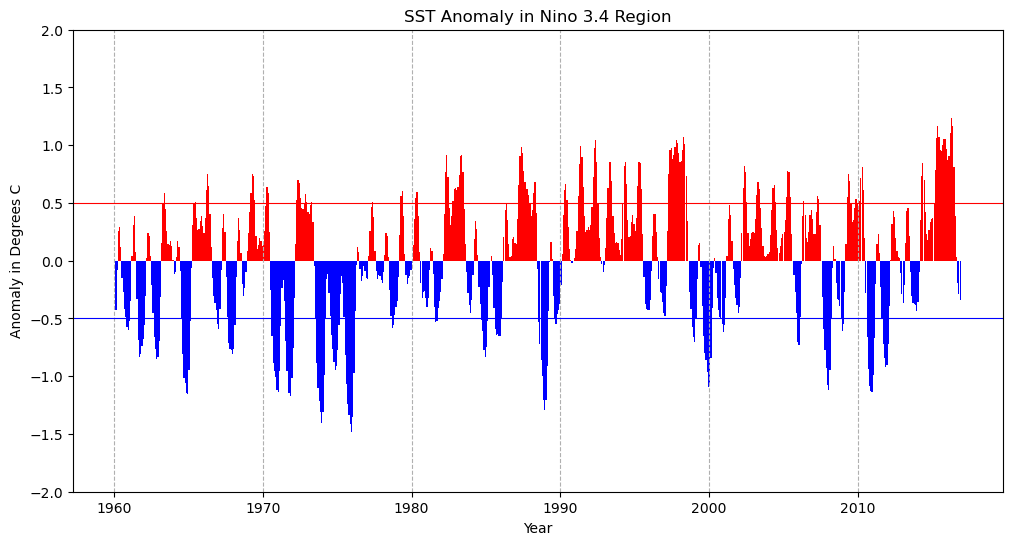

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.yaxis.set_ticks_position('left')
ax.set(title = 'SST Anomaly in Nino 3.4 Region',
       xlabel = 'Year',
       ylabel = 'Anomaly in Degrees C')
ax.bar(nino.index, nino['sst'],width=30,
       color = nino.sign.map({True: 'r', False: 'b'}))
ax.grid(ls = 'dashed', axis = 'x')
ax.set_ylim(-2.0,2.0)
ax.axhline(0.5,linewidth=0.8,color='red')
ax.axhline(-0.5,linewidth=0.8,color='blue')

## 3. Explore a netCDF dataset

Browse the NASA’s Goddard Earth Sciences Data and Information Services Center (GES DISC) website. Search and download a dataset you are interested in. You are also welcome to use data from your group in this problem set. But the dataset should be in `netCDF` format, and have temporal information.

### 3.1
Plot a time series of a certain variable with monthly seasonal cycle removed.

I use here a global monthly precipitation data for analysis.

In [16]:
# Read the dataset
ds3 = xr.open_dataset('data_files/precip.mon.mean.nc', engine='netcdf4')
ds3

<xarray.Dataset>
Dimensions:    (lat: 72, lon: 144, time: 518, nv: 2)
Coordinates:
  * lat        (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon        (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-02-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] ...
    lat_bnds   (lat, nv) float32 ...
    lon_bnds   (lon, nv) float32 ...
    precip     (time, lat, lon) float32 ...
Attributes: (12/18)
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    ...                    ...
    source:                https://www.ncei.noaa.gov/data/global-precipitatio...
    source_documentation:  https://www.ncdc.noaa.gov/cdr/atmospheric/precipit...
    NCO:                   4.6.9
    history:               Generated at NOAA/ESRL PSD Sep 9 2016 based on dat...
    References:            http://www.psl.noaa.gov/data/gridded/data.gpcp.html
    data_comment:          Interim data covers 2022/01 through latest.

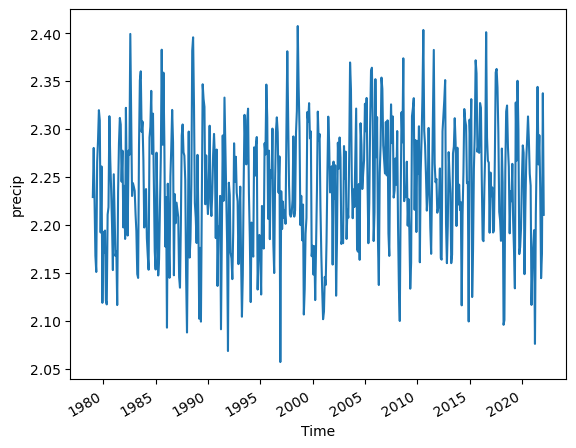

In [17]:
# Plot an overall time series
ds3.precip.mean(dim=['lat','lon']).plot()

### 3.2
Make at least 5 different plots using the dataset.

Text(0.5, 1.0, 'Fig. 1 Global Precipitation Mean')

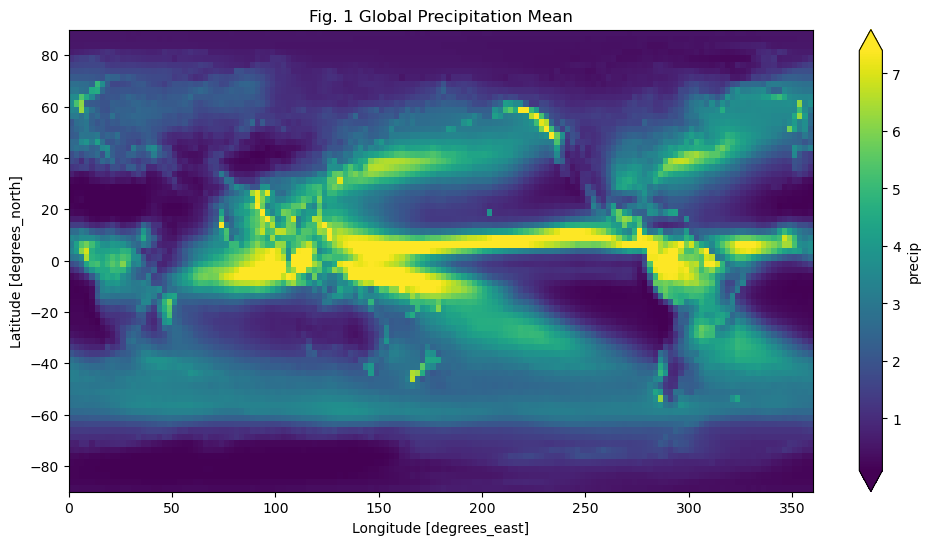

In [18]:
ds3.precip.mean(dim=['time']).plot(robust=True, figsize=(12, 6))
plt.title('Fig. 1 Global Precipitation Mean')

Text(0.5, 1.0, 'Fig.2 All-Time Averaged Precipitation \nat a Certain Region')

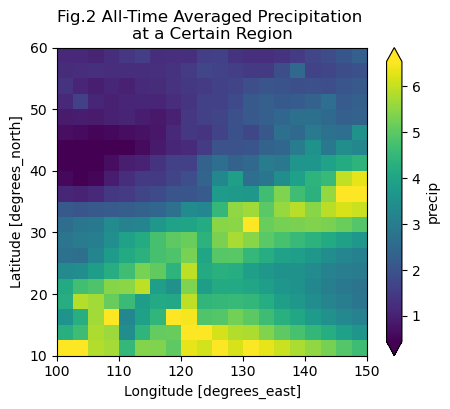

In [19]:
ds3.precip.mean(dim=['time']).sel(lon=slice(100,150),lat=slice(10,60)).plot(robust=True, figsize=(5, 4))
plt.title('Fig.2 All-Time Averaged Precipitation \nat a Certain Region')

E:\Programmes\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
E:\Programmes\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


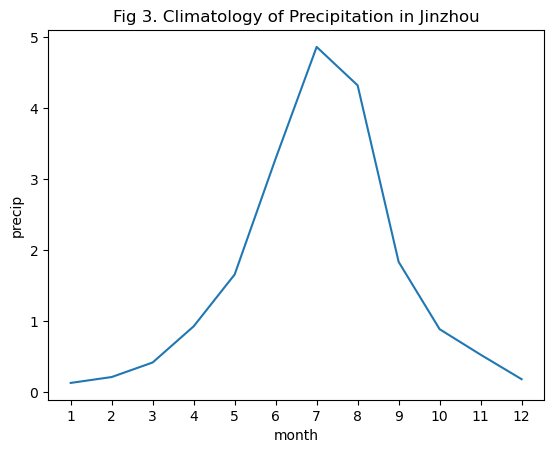

In [20]:
# Calculate the climatology 
precip_clim = ds3.precip.groupby('time.month').mean()
precip_clim

# Plot climatology at a specific point (Jinzhou, Liaoning)
precip_clim.sel(lon=121.13, lat=41.10, method='nearest').plot()
plt.xticks(np.arange(1,13))
plt.title('Fig 3. Climatology of Precipitation in Jinzhou')
plt.show()

E:\Programmes\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
E:\Programmes\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


Text(0.5, 1.0, 'Fig. 4 Anomalies of Precipitation in Jinzhou')

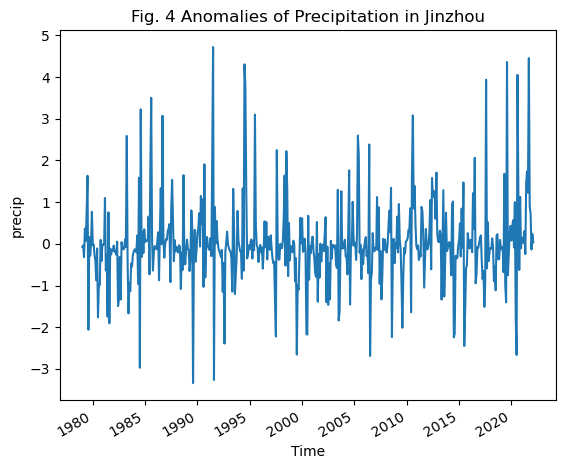

In [21]:
precip_anom = ds3.precip.groupby('time.month') - precip_clim
precip_anom.sel(lon=121.13, lat=41.10, method='nearest').plot()
plt.title('Fig. 4 Anomalies of Precipitation in Jinzhou')

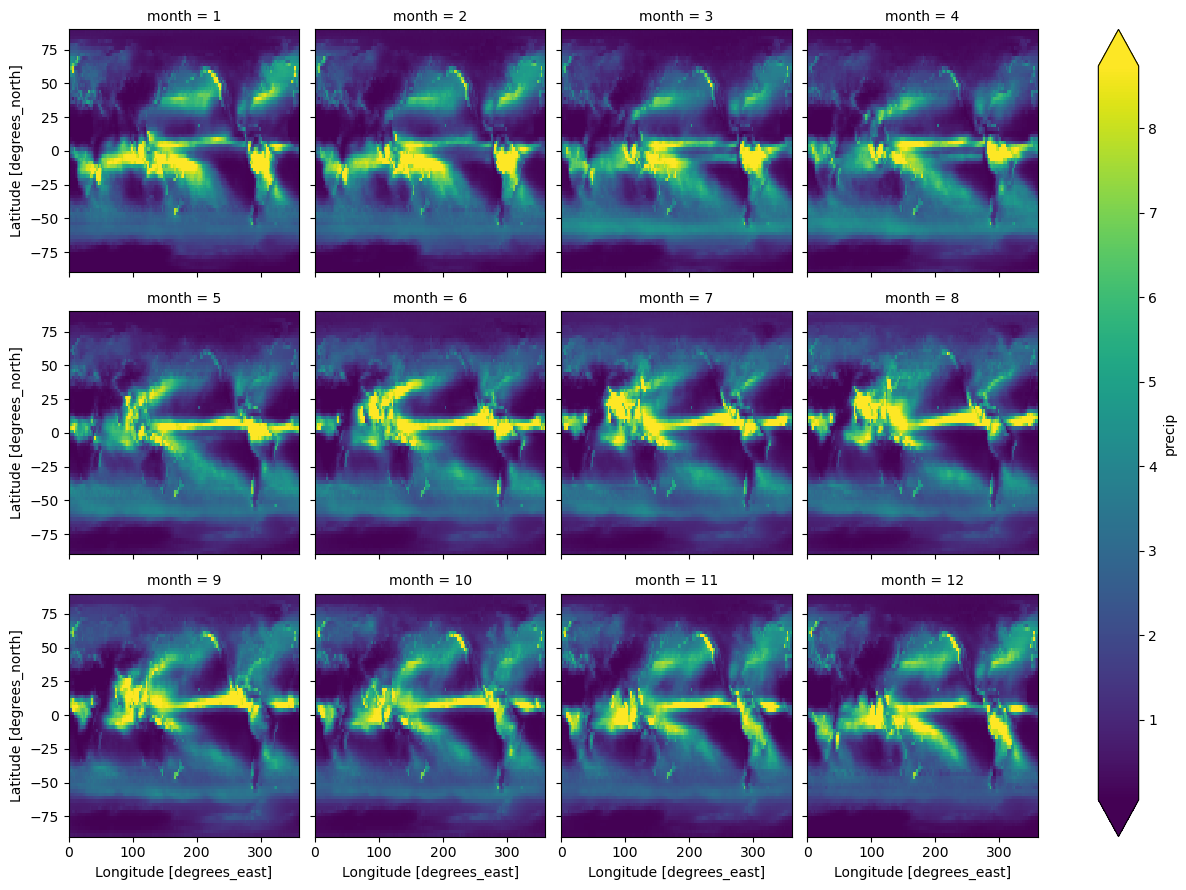

In [22]:
precip_clim.plot(col="month", col_wrap=4, robust=True)

Fig. 5 Global Precipitation Mean in Each Month